<a href="https://colab.research.google.com/github/raymond92928/AIcouse/blob/main/Neural_Network/%E6%89%8B%E5%AF%AB%E9%98%BF%E6%8B%89%E4%BC%AF%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98_%E5%B0%88%E5%AE%B6%E6%A8%A1%E5%BC%8F_NLL_LOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手寫阿拉伯數字辨識 專家模式

## 載入套件

In [ ]:
import os

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import MNIST

## 設定參數

In [ ]:
# 設定參數
PATH_DATASETS = "" # 預設路徑
BATCH_SIZE = 1024  # 批量
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cpu'

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 下載 MNIST 手寫阿拉伯數字 訓練資料
train_ds = MNIST(PATH_DATASETS, train=True, download=True,
                 transform=transforms.ToTensor())

# 下載測試資料
test_ds = MNIST(PATH_DATASETS, train=False, download=True,
                 transform=transforms.ToTensor())

# 訓練/測試資料的維度
print(train_ds.data.shape, test_ds.data.shape)

100%|██████████| 9912422/9912422 [00:00<00:00, 123174518.92it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 111031800.02it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44810907.42it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15035934.31it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


## 步驟2：資料清理，此步驟無需進行

## 步驟3：特徵工程，此步驟無需進行

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [ ]:
# 建立模型
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 256) # 完全連接層
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = torch.nn.Linear(256, 10) # 完全連接層
        self.dropout2 = nn.Dropout(0.2)

    def forward(self, x):
        # 完全連接層 + dropout + 完全連接層 + dropout + log_softmax
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        output = F.log_softmax(x, dim=1)
        return output

# 建立模型物件
model = Net().to(device)

## 步驟6：結合訓練資料及模型，進行模型訓練

In [ ]:
epochs = 5
lr=0.1

# 建立 DataLoader
train_loader = DataLoader(train_ds, batch_size=600)

# 設定優化器(optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

model.train()
loss_list = []
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        # 計算損失(loss)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 2.308171
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 42.366795
Epoch 1: [12000 / 60000] (20 %)  Loss: 28.629597
Epoch 1: [18000 / 60000] (30 %)  Loss: 9.725064
Epoch 1: [24000 / 60000] (40 %)  Loss: 10.378245
Epoch 1: [30000 / 60000] (50 %)  Loss: 7.504351
Epoch 1: [36000 / 60000] (60 %)  Loss: 6.458796
Epoch 1: [42000 / 60000] (70 %)  Loss: 7.623268
Epoch 1: [48000 / 60000] (80 %)  Loss: 3.390394
Epoch 1: [54000 / 60000] (90 %)  Loss: 3.168298
Epoch 2: [    0 / 60000] (0 %)  Loss: 3.194160
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 1.890625
Epoch 2: [12000 / 60000] (20 %)  Loss: 2.376853
Epoch 2: [18000 / 60000] (30 %)  Loss: 2.519787
Epoch 2: [24000 / 60000] (40 %)  Loss: 2.155840
Epoch 2: [30000 / 60000] (50 %)  Loss: 2.473734
Epoch 2: [36000 / 60000] (60 %)  Loss: 1.838770
Epoch 2: [42000 / 60000] (70 %)  Loss: 2.885223
Epoch 2: [48000 / 60000] (80 %)  Loss: 1.888168
Epoch 2: [54000 / 60000] (90 %)  Loss: 1.282561
Epoch 3: [    0 / 60000] (0 %)  Loss: 1

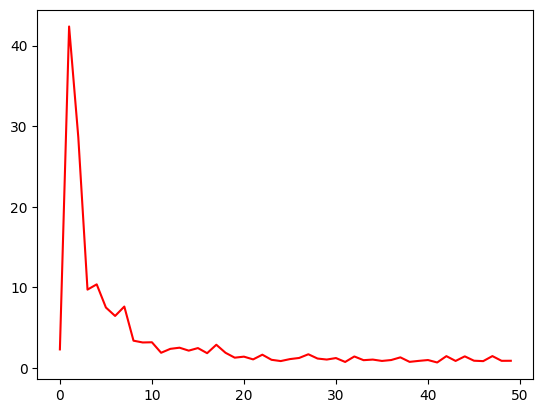

In [ ]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.plot(loss_list, 'r')

## 步驟7：評分(Score Model)

In [ ]:
# 建立 DataLoader
test_loader = DataLoader(test_ds, batch_size=600)

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)

        # sum up batch loss
        test_loss += F.nll_loss(output, target, reduction='sum').item()

        # 預測
        pred = output.argmax(dim=1, keepdim=True)

        # 正確筆數
        correct += pred.eq(target.view_as(pred)).sum().item()

# 顯示測試結果
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'準確率: {correct}/{data_count}' +
      f' ({percentage:.0f}%)\n')

平均損失: 0.7172, 準確率: 8637/10000 (86%)



In [ ]:
# 實際預測 20 筆資料
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_ds[i][0], test_ds[i][1]
        data = data.reshape(1, *data.shape).to(device)
        output = torch.argmax(model(data), axis=-1)
        predictions.append(str(output.item()))

# 比對
print('actual    :', test_ds.targets[0:20].numpy())
print('prediction: ', ' '.join(predictions[0:20]))

actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction:  7 2 1 0 4 1 4 1 5 9 0 6 9 0 1 5 9 7 3 4


## 步驟8：評估，暫不進行

## 步驟9：模型佈署

## 步驟10：新資料預測

In [ ]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)
    X1 = image_resized.reshape(1,28, 28) #/ 255.0

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = torch.FloatTensor(1-X1).to(device)

    # 預測
    predictions = torch.softmax(model(X1), dim=1)
    # print(np.around(predictions.cpu().detach().numpy(), 2))
    print(f'actual/prediction: {i} {np.argmax(predictions.detach().cpu().numpy())}')

actual/prediction: 0 5
actual/prediction: 1 1
actual/prediction: 2 2
actual/prediction: 3 7
actual/prediction: 4 4
actual/prediction: 5 5
actual/prediction: 6 6
actual/prediction: 7 7
actual/prediction: 8 8
actual/prediction: 9 2
